In [2]:
import sys
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
import time
import glob
import re
import random
import torch

sys.path.insert(0, '/home/panhailin/git_hub/softdtw_barycenter_cuda_large/')
import cuda_softdtw

sys.path.insert(0, '/home/panhailin/git_lab/npspy')
import npspy as nps
from npspy import npsc

In [30]:
obj = nps.io.read_pickle('../../00.data/hp1_1_valid80.pkl')

In [15]:
X_df = npsc.get_X_from_an_obj(obj)
X_df

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
hp1_1_1_sample1_channel100_Read_0_0.23~0.31_68629-93000,0.440430,0.379639,0.355469,0.360840,0.358643,0.357178,0.366699,0.345215,0.354248,0.353027,...,0.331543,0.330322,0.333008,0.329102,0.339844,0.335938,0.359131,0.347656,0.390869,0.465088
hp1_1_1_sample1_channel100_Read_0_0.59~0.67_176517-199940,0.459717,0.399414,0.384766,0.358154,0.359863,0.346436,0.341797,0.328369,0.325684,0.320801,...,0.292480,0.292969,0.288086,0.315674,0.320557,0.348633,0.331543,0.374512,0.405273,0.453613
hp1_1_1_sample1_channel100_Read_0_1.03~1.12_309857-336080,0.461670,0.385742,0.346924,0.334961,0.334473,0.322754,0.329102,0.312744,0.319092,0.331299,...,0.429688,0.427490,0.446533,0.438232,0.430664,0.418701,0.447266,0.455566,0.458008,0.464355
hp1_1_1_sample1_channel100_Read_0_1.33~1.41_399347-422689,0.468750,0.415283,0.373535,0.353271,0.346680,0.339600,0.329102,0.323975,0.318115,0.309570,...,0.364258,0.348877,0.323242,0.334229,0.348633,0.329102,0.318115,0.347412,0.397217,0.461914
hp1_1_1_sample1_channel100_Read_0_1.76~1.84_527040-551628,0.459717,0.415039,0.370605,0.346680,0.330811,0.331055,0.328369,0.324219,0.318604,0.319580,...,0.327393,0.318604,0.314697,0.312744,0.329590,0.334717,0.336182,0.405029,0.447754,0.464111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hp1_1_2_sample1_channel9_Read_0_94.55~94.62_28363857-28384617,0.453857,0.380371,0.347900,0.320557,0.304443,0.292236,0.287354,0.288086,0.283936,0.292725,...,0.444092,0.431641,0.427979,0.430176,0.440918,0.438477,0.452148,0.448486,0.456299,0.463379
hp1_1_2_sample1_channel9_Read_0_94.82~94.90_28445602-28470521,0.431885,0.366699,0.320068,0.310059,0.292969,0.290771,0.282959,0.289307,0.296631,0.315430,...,0.257568,0.268066,0.267090,0.258301,0.263672,0.310791,0.385986,0.418945,0.460693,0.465088
hp1_1_2_sample1_channel9_Read_0_95.35~95.42_28603978-28625029,0.465332,0.399658,0.384277,0.343018,0.323486,0.313965,0.301758,0.304199,0.292236,0.292969,...,0.315186,0.313721,0.315186,0.320312,0.318359,0.310791,0.385986,0.443115,0.448730,0.468018
hp1_1_2_sample1_channel9_Read_0_95.72~95.80_28716952-28738684,0.461914,0.371094,0.326904,0.308105,0.292236,0.291016,0.293457,0.291504,0.286377,0.295166,...,0.346191,0.355957,0.362549,0.362061,0.322266,0.327393,0.320801,0.332520,0.351074,0.435791


In [18]:
X = np.array(X_df).reshape(-1,1000,1)

In [19]:
# X = np.random.randn(10000).reshape(10,1000,1)
# X

In [ ]:
cuda_softdtw.softdtw_barycenter(X, chunk_shape=(1, 10, 2**9, 2**10))

In [12]:
latent = np.array(pd.read_csv('../../03.results/method_setup/hp1_1/hp1_1_valid80_latent.csv', index_col=0))

In [13]:
latent = torch.Tensor(latend)

In [21]:
latent = latent.mean(axis=0)[None,:]

In [9]:
trainer = npsc.Trainer(
    model_name='ShapeAwareAutoencoder',
    device='cpu',
)

Model ShapeAwareAutoencoder has total parameter number: 1.02 M


In [11]:
trainer.model.load_state_dict(torch.load(f'hp1_1_valid80_best_model.pth', weights_only=True))

<All keys matched successfully>

In [22]:
decoder_input = latent.unsqueeze(1).repeat(1, 50, 1)

In [23]:
lstm_dec_out, _ = trainer.model.lstm_decoder(decoder_input)

In [24]:
lstm_dec_out = lstm_dec_out.permute(0, 2, 1)

In [25]:
recon = trainer.model.cnn_decoder(lstm_dec_out).squeeze(1)

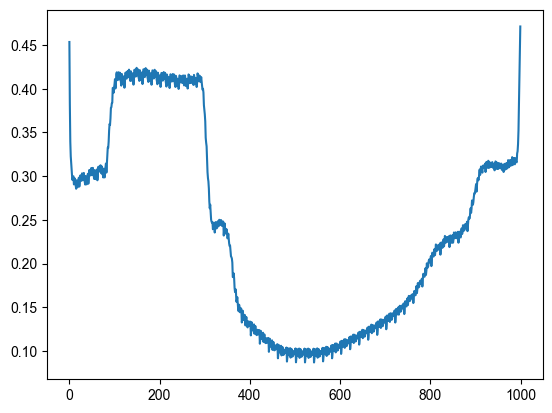

In [31]:
plt.plot(recon[0].detach().numpy())

<Axes: xlabel='time (1/5000 s)', ylabel='current'>

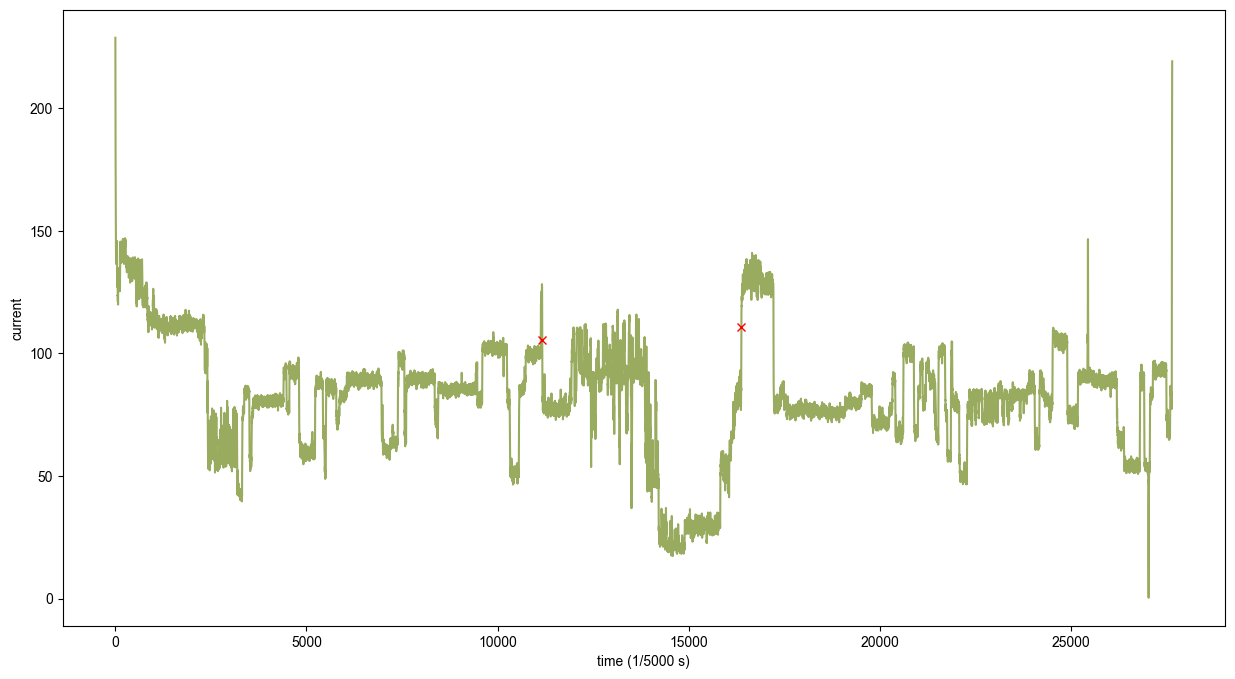

In [37]:
nps.pl.draw_one_read_with_window(obj, list(obj.keys())[5])

In [38]:
rec = recon[0].detach().numpy()

In [58]:
import scipy.signal
y = scipy.signal.medfilt(rec, kernel_size=41)
y[0:10] = rec[0:10]
y[-10:] = rec[-10:]

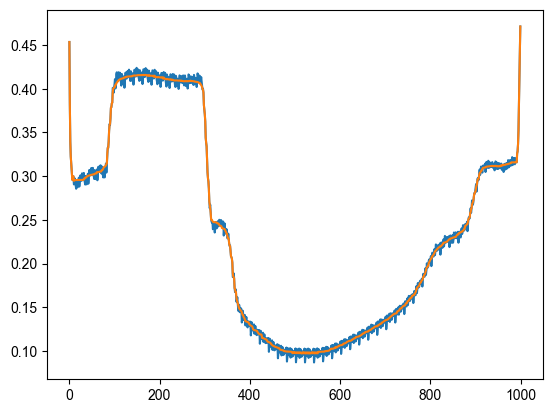

In [59]:
plt.plot(rec)
plt.plot(y)